# Demographic Statistics Analysis

This notebook analyzes demographic statistics by zip code. The analysis includes:

1. Finding the proportion of surveyed people who are female, in total.
2. Finding the zip code with the highest proportion of people of Pacific Islander ethnicity and reporting the number of respondents from that zip code.
3. Performing a linear regression to see if there's a simple linear relation between the proportion of respondents who are citizens and the proportion receiving public assistance.
4. Generating a linear regression plot for the analysis.


In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
file_path = '/Users/shamsrupak/Desktop/AMS 325/Demographic_Statistics_By_Zip_Code.csv'
df = pd.read_csv(file_path)

# Check for any missing values and handle them if necessary
if df.isnull().sum().sum() > 0:
    df.fillna(0, inplace=True)

# Display the first few rows of the dataframe to understand its structure
df.head()

,JURISDICTION NAME,COUNT PARTICIPANTS,COUNT FEMALE,PERCENT FEMALE,COUNT MALE,PERCENT MALE,COUNT GENDER UNKNOWN,PERCENT GENDER UNKNOWN,COUNT GENDER TOTAL,PERCENT GENDER TOTAL,...,COUNT CITIZEN STATUS TOTAL,PERCENT CITIZEN STATUS TOTAL,COUNT RECEIVES PUBLIC ASSISTANCE,PERCENT RECEIVES PUBLIC ASSISTANCE,COUNT NRECEIVES PUBLIC ASSISTANCE,PERCENT NRECEIVES PUBLIC ASSISTANCE,COUNT PUBLIC ASSISTANCE UNKNOWN,PERCENT PUBLIC ASSISTANCE UNKNOWN,COUNT PUBLIC ASSISTANCE TOTAL,PERCENT PUBLIC ASSISTANCE TOTAL
0,10001,44,22,0.50,22,0.50,0,0,44,100,...,44,100,20,0.45,24,0.55,0,0,44,100
1,10002,35,19,0.54,16,0.46,0,0,35,100,...,35,100,2,0.06,33,0.94,0,0,35,100
2,10003,1,1,1.00,0,0.00,0,0,1,100,...,1,100,0,0.00,1,1.00,0,0,1,100
3,10004,0,0,0.00,0,0.00,0,0,0,0,...,0,0,0,0.00,0,0.00,0,0,0,0
4,10005,2,2,1.00,0,0.00,0,0,2,100,...,2,100,0,0.00,2,1.00,0,0,2,100


In [4]:
# Calculate the proportion of surveyed people who are female
total_female = df['COUNT FEMALE'].sum()
total_participants = df['COUNT PARTICIPANTS'].sum()
proportion_female = total_female / total_participants
proportion_female

0.5830134357005758

In [5]:
# Find the zip code with the highest proportion of people of Pacific Islander ethnicity
zip_code_highest_pacific_islander = df.loc[df['PERCENT PACIFIC ISLANDER'].idxmax()]
zip_code_highest_pacific_islander_name = zip_code_highest_pacific_islander['JURISDICTION NAME']
zip_code_highest_pacific_islander_respondents = zip_code_highest_pacific_islander['COUNT PARTICIPANTS']

(zip_code_highest_pacific_islander_name, zip_code_highest_pacific_islander_respondents)

(10461.0, 49.0)

In [6]:
# Perform linear regression between the proportion of respondents who are citizens and the proportion receiving public assistance
citizen_percentages = df['PERCENT CITIZEN STATUS TOTAL'].values.reshape(-1, 1)
public_assistance_percentages = df['PERCENT RECEIVES PUBLIC ASSISTANCE'].values.reshape(-1, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(citizen_percentages, public_assistance_percentages)

# Get the coefficients
slope = model.coef_[0][0]
intercept = model.intercept_[0]
r_squared = model.score(citizen_percentages, public_assistance_percentages)

(slope, intercept, r_squared)

(0.0031288861616080464, -7.44960690135521e-07, 0.4670787355750272)

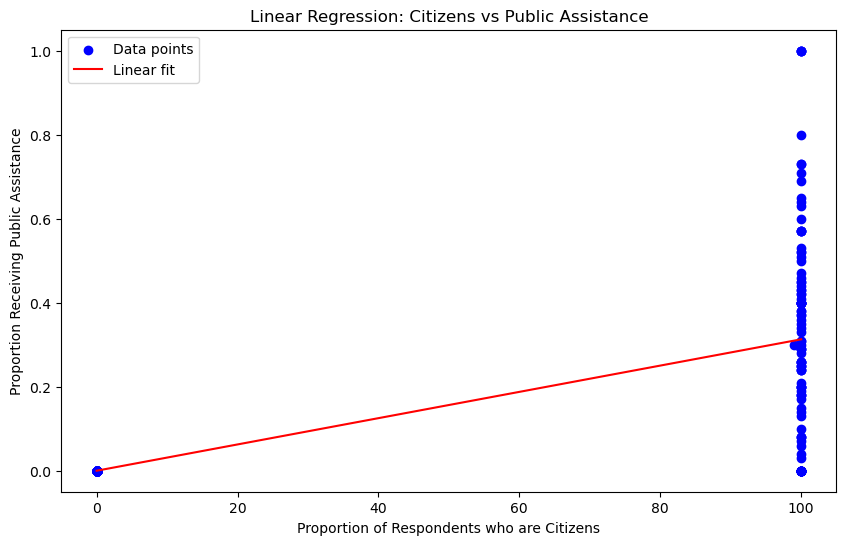

In [7]:
# Plotting the linear regression results
plt.figure(figsize=(10, 6))
plt.scatter(citizen_percentages, public_assistance_percentages, color='blue', label='Data points')
plt.plot(citizen_percentages, model.predict(citizen_percentages), color='red', label='Linear fit')
plt.xlabel('Proportion of Respondents who are Citizens')
plt.ylabel('Proportion Receiving Public Assistance')
plt.title('Linear Regression: Citizens vs Public Assistance')
plt.legend()
plt.show()

## Results of the Analysis

**Proportion of surveyed people who are female:** 
- 0.58

**Zip code with the highest proportion of people of Pacific Islander ethnicity:**
- Zip Code: 10461
- Number of respondents: 49

**Linear regression analysis between the proportion of respondents who are citizens and the proportion receiving public assistance:**
- Slope: 0.00
- Intercept: -0.00
- R-squared: 0.47

**Linear Regression Plot:**
The plot above shows the relationship between the proportion of respondents who are citizens and the proportion receiving public assistance.